# Emotion analysis example

### This Python 2 Jupyter notebook shows you how to get started with the <b>Emotion API</b> in Python, and how to visualize your results.

In [1]:
import time 
import requests
import operator
import numpy as np
from __future__ import print_function
import json
from urlparse import urlparse
from urllib import urlencode
from urllib2 import Request, urlopen
from httplib import HTTPSConnection 
# Import library to display results
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image as PILImage
%matplotlib inline 
# Display images within Jupyter

In [2]:
f = urlopen('https://gist.githubusercontent.com/antriv/a6962d2c7580a0f7db4b7aabd6d768c5/raw/38a66f77c7fd0641324c8cbbff77828207041edc/config.json')
CONFIG=json.loads(f.read())
# grab key from json in config
subscription_key = CONFIG['subscription_key_Emotion']

In [3]:
# Variables

_url = 'https://api.projectoxford.ai/emotion/v1.0/recognize'
_key = subscription_key
_maxNumRetries = 10

## Helper functions

In [4]:
def processRequest( json, data, headers, params ):

    """
    Helper function to process the request to Project Oxford

    Parameters:
    json: Used when processing images from its URL. See API Documentation
    data: Used when processing image read from disk. See API Documentation
    headers: Used to pass the key information and the data type request
    """

    retries = 0
    result = None

    while True:

        response = requests.request( 'post', _url, json = json, data = data, headers = headers, params = params )

        if response.status_code == 429: 

            print( "Message: %s" % ( response.json()['error']['message'] ) )

            if retries <= _maxNumRetries: 
                time.sleep(1) 
                retries += 1
                continue
            else: 
                print( 'Error: failed after retrying!' )
                break

        elif response.status_code == 200 or response.status_code == 201:

            if 'content-length' in response.headers and int(response.headers['content-length']) == 0: 
                result = None 
            elif 'content-type' in response.headers and isinstance(response.headers['content-type'], str): 
                if 'application/json' in response.headers['content-type'].lower(): 
                    result = response.json() if response.content else None 
                elif 'image' in response.headers['content-type'].lower(): 
                    result = response.content
        else:
            print( "Error code: %d" % ( response.status_code ) )
            print( "Message: %s" % ( response.json()['error']['message'] ) )

        break
        
    return result

In [5]:
def renderResultOnImage( result, img ):
    
    """Display the obtained results onto the input image"""
    
    for currFace in result:
        faceRectangle = currFace['faceRectangle']
        cv2.rectangle( img,(faceRectangle['left'],faceRectangle['top']),
                           (faceRectangle['left']+faceRectangle['width'], faceRectangle['top'] + faceRectangle['height']),
                       color = (255,0,0), thickness = 5 )


    for currFace in result:
        faceRectangle = currFace['faceRectangle']
        currEmotion = max(currFace['scores'].items(), key=operator.itemgetter(1))[0]


        textToWrite = "%s" % ( currEmotion )
        cv2.putText( img, textToWrite, (faceRectangle['left'],faceRectangle['top']-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1 )

In [6]:
# def renderResultOnImage2( result, img):
import matplotlib.pyplot as plt


urlImage = ''



## Detect faces from an image retrieved via URL

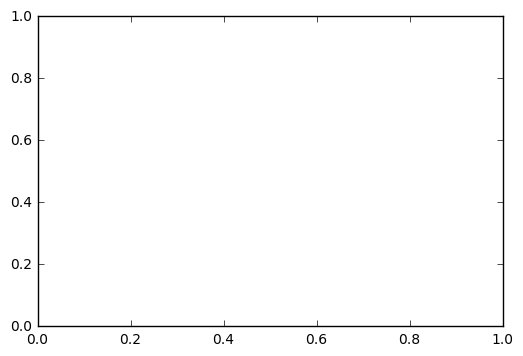

In [ ]:
# URL direction to image
urlImage = 'https://raw.githubusercontent.com/Microsoft/ProjectOxford-ClientSDK/master/Face/Windows/Data/detection3.jpg'

headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
headers['Content-Type'] = 'application/json' 

json = { 'url': urlImage } 
data = None
params = None

result = processRequest( json, data, headers, params )

import cStringIO

# Create figure and axes
fig,ax = plt.subplots(1)

In [ ]:
# Display the image
myfile = cStringIO.StringIO(urlopen(urlImage).read())
im = PILImage.open(myfile)
ax.imshow(im)

for currFace in result:
    faceRectangle = currFace['faceRectangle']

    # Create a Rectangle patch
    rect = patches.Rectangle((faceRectangle['left'], faceRectangle['top']),faceRectangle['width'], faceRectangle['height'],
                           linewidth=1,edgecolor='r',facecolor='none' )

    # Add the patch to the Axes
    ax.add_patch(rect)
    
    currEmotion = str(max(currFace['scores'].items(), key=operator.itemgetter(1))[0])
    plt.text(faceRectangle['left'],faceRectangle['top'], currEmotion, color = 'r')

plt.show()